In [4]:
print("Hello World!")


Hello World!


In [5]:
%pip install pandas scikit-learn matplotlib joblib seaborn nltk wordcloud


Note: you may need to restart the kernel to use updated packages.


In [6]:
!wget -O bbc-fulltext.zip http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip


--2026-01-16 09:44:15--  http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
Resolving mlg.ucd.ie (mlg.ucd.ie)... 137.43.93.132
Connecting to mlg.ucd.ie (mlg.ucd.ie)|137.43.93.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874079 (2.7M) [application/zip]
Saving to: ‘bbc-fulltext.zip’

bbc-fulltext.zip    100%[===================>]   2.74M  2.68MB/s    in 1.0s    

2026-01-16 09:44:17 (2.68 MB/s) - ‘bbc-fulltext.zip’ saved [2874079/2874079]



In [7]:
!unzip bbc-fulltext.zip

Archive:  bbc-fulltext.zip
replace bbc/entertainment/289.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
!ls -l

total 7800
drwxr-xr-x+ 7 codespace codespace    4096 Apr  5  2015 bbc
-rw-rw-rw-  1 codespace codespace 2874079 Mar 27  2022 bbc-fulltext.zip
-rw-rw-rw-  1 codespace codespace 5090121 Jan 15 08:53 bbc-text.csv
-rw-rw-rw-  1 codespace codespace   15239 Jan 16 09:50 train.ipynb


In [9]:
import os
import pandas as pd

texts = []
categories = []

base_path = "bbc"

for category in os.listdir(base_path):
    category_path = os.path.join(base_path, category)
    if not os.path.isdir(category_path):
        continue
    for filename in os.listdir(category_path):
        file_path = os.path.join(category_path, filename)
        with open(file_path, "r", encoding="latin-1") as f:
            texts.append(f.read())
            categories.append(category)

bbc_text = pd.DataFrame({
    "text": texts,
    "category": categories
})

bbc_text.head()

,text,category
0,'Nuclear dumpsite' plan attacked\n\nPlans to a...,politics
1,Howard unveils election platform\n\nThe Conser...,politics
2,Tory candidate quits over remark\n\nA Conserva...,politics
3,Brown targets OAPs and homebuyers\n\nGordon Br...,politics
4,Campaign 'cold calls' questioned\n\nLabour and...,politics


In [10]:
bbc_text.to_csv("bbc-text.csv", index=False)

In [11]:
!ls -l

total 7800
drwxr-xr-x+ 7 codespace codespace    4096 Apr  5  2015 bbc
-rw-rw-rw-  1 codespace codespace 2874079 Mar 27  2022 bbc-fulltext.zip
-rw-rw-rw-  1 codespace codespace 5090121 Jan 16 09:50 bbc-text.csv
-rw-rw-rw-  1 codespace codespace   15310 Jan 16 09:50 train.ipynb


In [12]:
# Read Files into Python

import pandas as pd

# Read our dataset using read_csv()
bbc_text = pd.read_csv('bbc-text.csv')
bbc_text=bbc_text.rename(columns = {'text': 'News_Headline'}, inplace = False)
bbc_text.head()

,News_Headline,category
0,'Nuclear dumpsite' plan attacked\n\nPlans to a...,politics
1,Howard unveils election platform\n\nThe Conser...,politics
2,Tory candidate quits over remark\n\nA Conserva...,politics
3,Brown targets OAPs and homebuyers\n\nGordon Br...,politics
4,Campaign 'cold calls' questioned\n\nLabour and...,politics


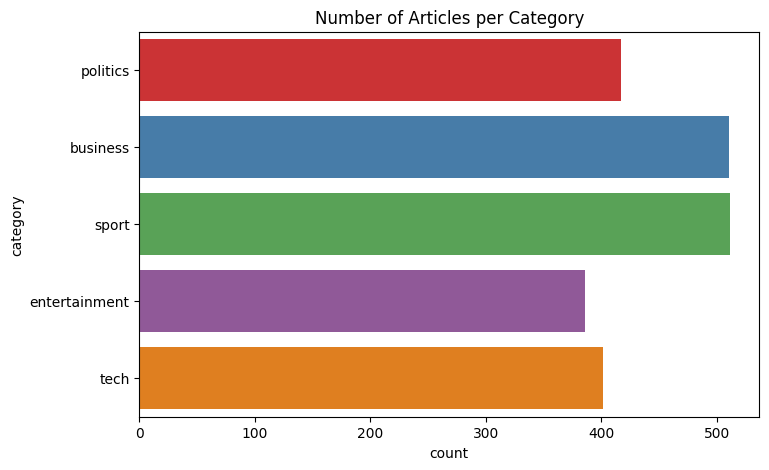

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(
    data=bbc_text,
    y="category",
    hue="category",
    palette="Set1",
    legend=False
)
plt.title("Number of Articles per Category")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


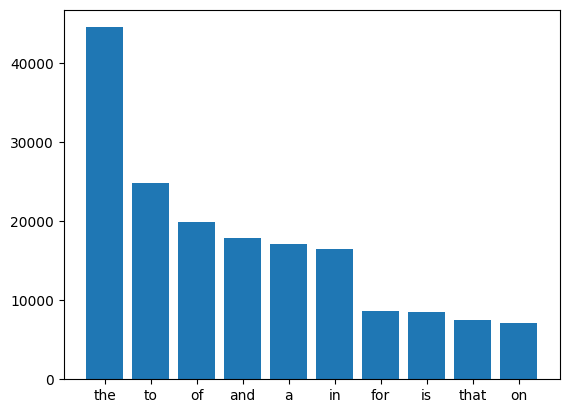

In [14]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def plot_stopwords(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in stop:
            dictionary_stopwords[word]+=1
            
    top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(bbc_text['News_Headline'])

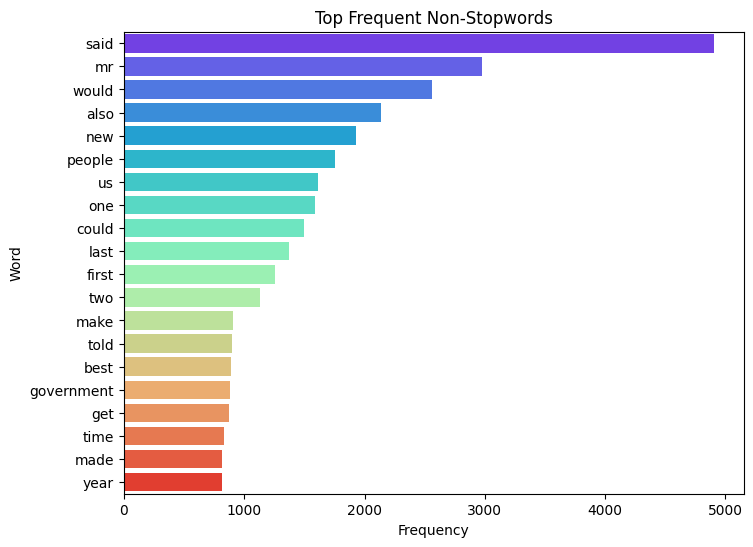

In [15]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

def top_frequent_words(data):
    stop = set(stopwords.words('english'))

    data_split = data.str.lower().str.split()
    data_list = data_split.values.tolist()
    corpus = [word for i in data_list for word in i]

    counter = Counter(corpus)
    most_common = counter.most_common()

    words, counts = [], []
    for word, count in most_common:
        if word not in stop and word.isalpha():
            words.append(word)
            counts.append(count)
        if len(words) == 20:
            break

    # Create DataFrame for seaborn
    plot_df = pd.DataFrame({
        "word": words,
        "count": counts
    })

    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=plot_df,
        x="count",
        y="word",
        hue="word",
        palette="rainbow",
        legend=False
    )
    plt.title("Top Frequent Non-Stopwords")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.show()

top_frequent_words(bbc_text["News_Headline"])

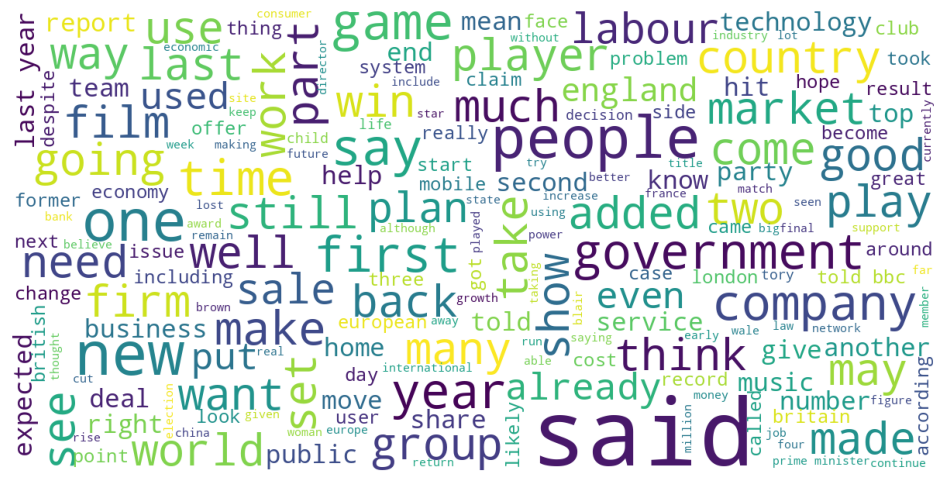

In [16]:
import os
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

# Force NLTK data to live inside the repo (so it persists and is discoverable)
NLTK_DATA_DIR = os.path.join(os.getcwd(), "nltk_data")
os.makedirs(NLTK_DATA_DIR, exist_ok=True)

# Tell NLTK explicitly where to look
if NLTK_DATA_DIR not in nltk.data.path:
    nltk.data.path.insert(0, NLTK_DATA_DIR)


for pkg in ["stopwords", "wordnet", "punkt", "punkt_tab", "omw-1.4"]:
    try:
        nltk.download(pkg, download_dir=NLTK_DATA_DIR, quiet=True)
    except Exception as e:
        print(f"NLTK download warning for {pkg}: {e}")

# Use the tokenizer directly (avoids some wrapper edge-cases)
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

def plot_wordcloud(data):
    stop = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()

    corpus = []
    for text in data:
        tokens = tokenizer.tokenize(str(text).lower())
        tokens = [
            lemmatizer.lemmatize(w)
            for w in tokens
            if w.isalpha() and w not in stop and len(w) > 2
        ]
        corpus.extend(tokens)

    wc = WordCloud(
        background_color="white",
        stopwords=STOPWORDS,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(" ".join(corpus))

    plt.figure(figsize=(12, 12))
    plt.axis("off")
    plt.imshow(wc)
    plt.show()

# Run
plot_wordcloud(bbc_text["News_Headline"])